In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt 
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [68]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
dataset = dataset.drop(['day','month','year'],axis=1)

In [70]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1    RH          245 non-null    object
 2    Ws          245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      244 non-null    object
dtypes: object(11)
memory usage: 21.4+ KB


In [4]:
dataset[dataset.isnull().any(axis=1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
dataset.loc[:122,'Region']=0
dataset.loc[122:,'Region']=1

In [6]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [7]:
dataset[['Region']]=dataset[['Region']].astype(int)

In [8]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1    RH          245 non-null    object
 2    Ws          245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      244 non-null    object
 11  Region       247 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 23.3+ KB


In [9]:
dataset.columns = dataset.columns.str.strip()

In [80]:
dataset.isna().sum()

Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [10]:
dataset = dataset.dropna().reset_index(drop=True)

In [82]:
dataset.isna().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
dataset.iloc[[122]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
dataset = dataset.drop(122).reset_index(drop=True)

In [13]:
dataset.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
dataset[['Temperature', 'RH', 'Ws']] = dataset[['Temperature', 'RH', 'Ws']].astype(int)

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    int64 
 1   RH           243 non-null    int64 
 2   Ws           243 non-null    int64 
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      243 non-null    object
 11  Region       243 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 22.9+ KB


In [15]:
dataset[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']]=dataset[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']].astype(float)

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [16]:
dataset['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [17]:
dataset['Classes'] = np.where(dataset['Classes'].str.contains('not fire'),0,1)

In [66]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [59]:
dataset.to_csv('Algerian_forest_updated',index=False)

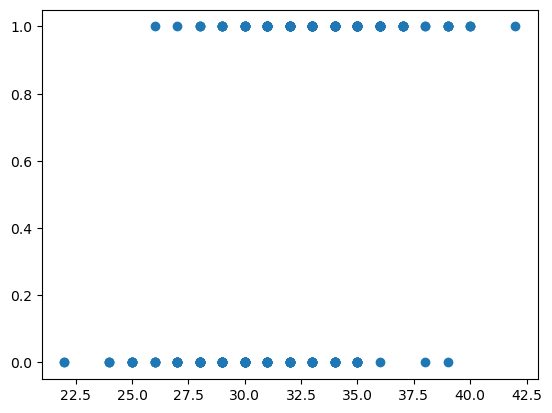

In [18]:
plt.scatter('Temperature','Classes',data=dataset)

In [19]:
dataset['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

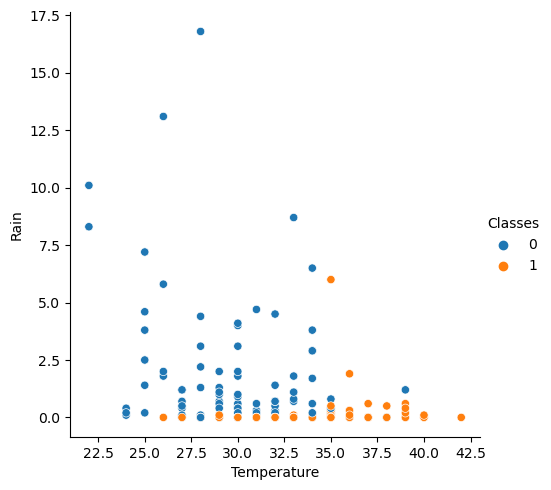

In [20]:
sns.relplot(data=dataset,x='Temperature',y='Rain',hue='Classes')

In [21]:
X = dataset.drop('FWI',axis=1)
y = dataset['FWI']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [38]:
regressor = LinearRegression()

In [39]:
regressor.fit(X_train , y_train)

LinearRegression()

In [40]:
y_pred = regressor.predict(X_test)

In [47]:
mse = mean_squared_error(y_test,y_pred)
mas = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse,mas,rmse)

0.45608770256211995 0.4892190222486652 0.6753426556660848


In [49]:
score = r2_score(y_test,y_pred)
score

0.9896250226957264

In [51]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.9875135923825468

In [52]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.9572011718945114

In [53]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

en = ElasticNet()
en.fit(X_train,y_train)
y_pred = en.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.9055400114325294

In [54]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regressor,open('regressor.pkl','wb'))


In [55]:
model_regressor = pickle.load(open('regressor.pkl','rb'))

In [62]:
y_pred = model_regressor.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.9896250226957264

In [63]:
pickle.dump(ridge,open('ridge.pkl','wb'))